## Logisti Regression In Medical Industry - Study Case Heart Disease

### Import Library

In [105]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [106]:
df = pd.read_csv('heart.csv')

### Sneak Peak Data

In [107]:
#Melihat 5 data teratas
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [108]:
#Melihat 5 data terbawah
df.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0

In [109]:
#Melihat jumlah rows (303) dan jumlah kolom/features (14)
df.shape

(303, 14)

In [110]:
#General information dari data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


### Handling Missing Values

In [111]:
#Data sudah clean dan bisa dilanjutkan ke tahap EDA
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Exploratory Data Analysis

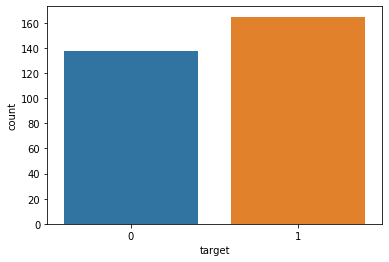

In [112]:
#Univariate analysis target.
sns.countplot(df['target'])

- Sepertinya sudah balance karena jumlah nilai 0 dan 1 tidak berbeda jauh.
- Nilai 0 untuk Heart Disease.
- Nilai 1 untuk No Heart Disease.

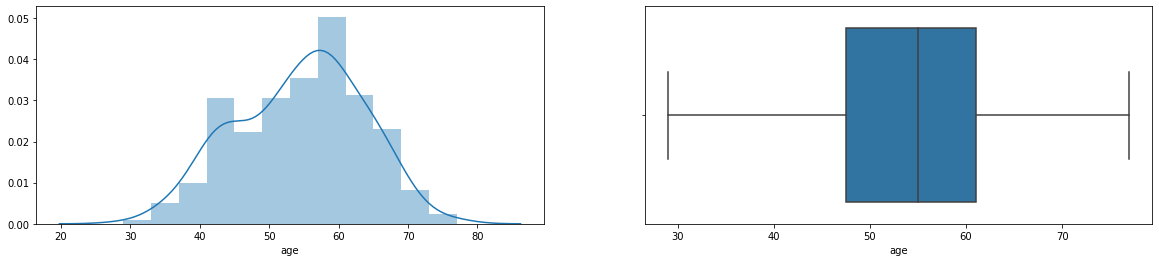

In [113]:
#Univariate analysis age.

f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(df['age'])

f.add_subplot(1,2,2)
sns.boxplot(df['age'])

- Dari distplot dapat dilihat bahwa density dari data terletak di kisaran angka 50-60 tahun dan sangat jarang pasien yang berumur 30 tahun kebawah atau 80 tahun keatas.
- Dari boxplot menunjukan bahwa data tidak memiliki outlier.

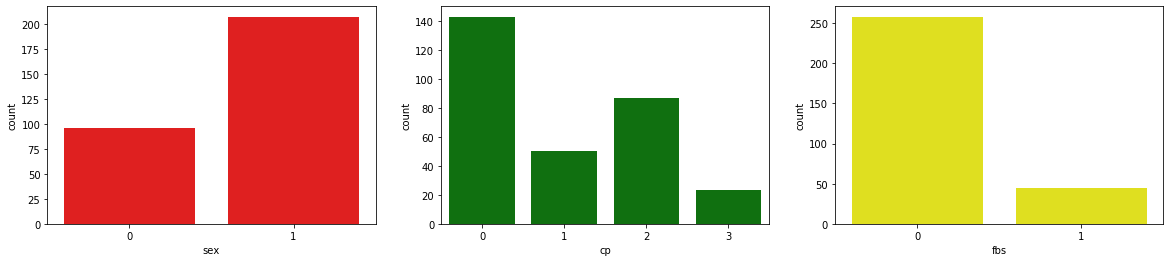

In [114]:
#Univariate analysis sex: 1=male; 0=female.
#Univariate analysis chest pain type (cp): 0=typical angina; 1=atypical angine; 2=non-anginal pain; 3=asymptomatic
#Univariate analysis fasting blood sugar: 1 if > 120 mg/dl; 0 otherwise.

f = plt.figure(figsize=(20,4))

f.add_subplot(1,3,1)
sns.countplot(df['sex'], color='red')

f.add_subplot(1,3,2)
sns.countplot(df['cp'], color='green')

f.add_subplot(1,3,3)
sns.countplot(df['fbs'], color='yellow')

- Pasien male/laki-laki ternyata memiliki jumlah lebih banyak bahkan 2x lipat dari jumlah pasien female/perempuan.
- Paling banyak pasien memiliki tipe cp 0 yaitu typical angine dan paling sedikit bertipe 3 yaitu asymptomatic.
- Grafik diatas menunjukan bahwa nilai fasting blood sugar banyak sekali yang dibawah 120 atau bernilai 0.

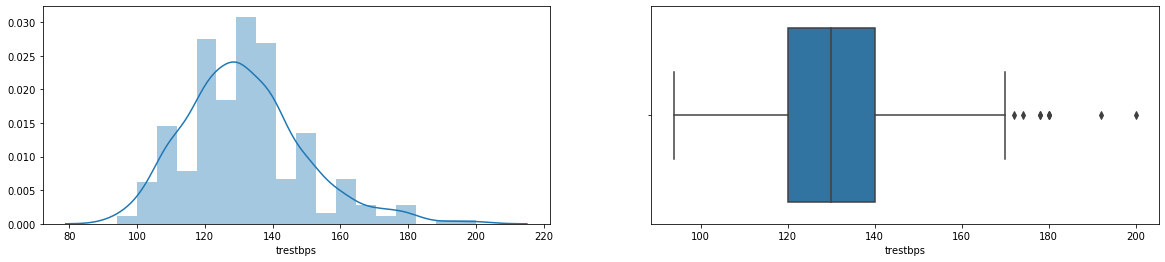

In [115]:
#Univariate analysis resting blood pressure (mm Hg) atau trestbps.

f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(df['trestbps'])

f.add_subplot(1,2,2)
sns.boxplot(df['trestbps'])

- Untuk nilai resting blood pressure atau trestbps paling banyak di angka 120 - 140 mmHg.
- Features trestbps memiliki beberapa outlier.

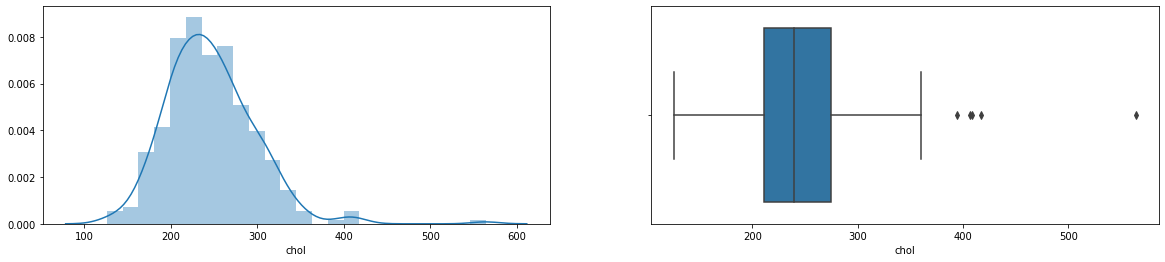

In [116]:
#Univariate analysis serum cholestrol (mg/dl) atau chol.

f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(df['chol'])

f.add_subplot(1,2,2)
sns.boxplot(df['chol'])

- Untuk serum cholestrol terpusat di kisaran angka 200-300 mg/dl.
- Features chol memiliki beberapa outlier.

In [117]:
#Univariate analysis maximum heart rate achieved atau thalach.

f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(df['thalach'])

f.add_subplot(1,2,2)
sns.boxplot(df['thalach'])

- Distplot menunjukan bahwa nilai dari maxium heart rate atau thalach paling padat di kisaran angka 130 - 175.
- Boxpplot menunjukan bahwa ada 1 outlier yang nilainya dibawah 80.

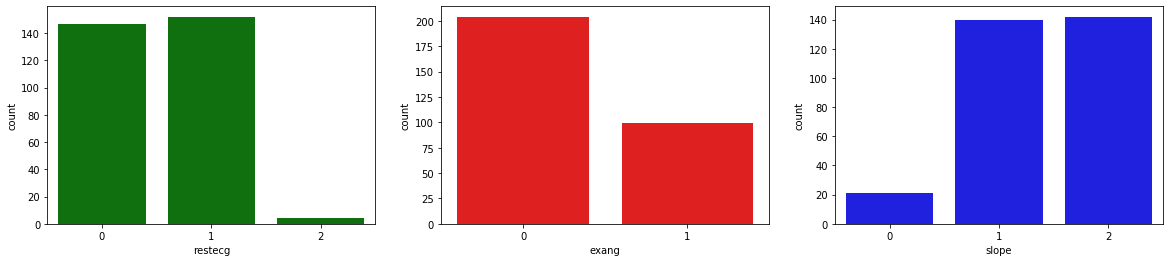

In [118]:
#Univariate analysis resting electrocardiographic results atau restecg.
#0=normal; 1=having ST-T wave abnormality; 2=showing probable or definite left ventricular hypertrophy.
#Univariate analysis exercise induced angina atau exang.
# 1=yes; 0=no.
#Univariate analysis the slope of the peak exercise ST segment.
#0=upsloping; 1=flat; 2=downsloping.

f = plt.figure(figsize=(20,4))

f.add_subplot(1,3,1)
sns.countplot(df['restecg'], color='green')

f.add_subplot(1,3,2)
sns.countplot(df['exang'], color='red')

f.add_subplot(1,3,3)
sns.countplot(df['slope'], color='blue')

- Dapat dilihat bahwa nilai 0 dan 1 hampir berimbang tetapi untuk nilai 2 pada features restecg sangat sedikit yaitu dibawah 10.
- Nilai 0 lebih banyak sekitar 2x lipat dari nilai 1 yang berarti yaitu pasien tidak mengalami induced angine saat exercise lebih banyak daripada yang mengalami induced saat exercise.
- Features slope nilai 1 yaitu flat dan 2 yaitu downsloping memiliki nilai yang hampir sama yaitu sekitar 140 dan nilali 0 dimana itu merupakan upsloping mempunyai nilai sangat sedikit yaitu sekitar 20.

In [119]:
#Univariate analysis ST depression induced by exercise relative to rest.

f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(df['oldpeak'])

f.add_subplot(1,2,2)
sns.boxplot(df['oldpeak'])

- Dari distplot dapat dilihat bahwa features oldpeak terpusat di angka 0.
- Features oldpeak memiliki beberapa outlier diatas nilai 4.

In [120]:
#Univariate analysis ca number of major vessels (0-3) colored by flourosopy.
#Univariate analysis thal.

f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
df['ca'].value_counts().plot('bar', color='red')

f.add_subplot(1,2,2)
df['thal'].value_counts().plot('bar', color='green')

- Untuk features ca, nilai paling banyak adalah 0 yang memiliki jumlah major vessels sebanyak 0 dan paling sedikit adalah 4.
- Sedangkan untuk features thal sebagian besar di nilai 2 dan paling sedikit adalah nilai 0.

In [121]:
#Mencari nilai korelasi antar features.
df.corr().style.background_gradient().set_precision(2)

- Terdapat hubungan linear positif yang cukup kuat antara target dengan cp, thalach, dan slope.
- Sedangkan untuk hubungan linear negatif, target mempunyai hubungan yang kuat dengan exang, oldpeak, ca, dan thal.

### Modelling

In [122]:
#Membuat object Logistic Regression
log_reg = LogisticRegression()

In [123]:
#Membuat variable x dan y
x = df.drop(columns=['target'])
y = df['target']

In [124]:
#Split data kedalam training dan testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [125]:
#Training the model
log_reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [126]:
#Predict testing set
y_pred = log_reg.predict(x_test)

In [127]:
#Check performa model menggunakan classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87        25
           1       0.89      0.94      0.92        36

    accuracy                           0.90        61
   macro avg       0.90      0.89      0.90        61
weighted avg       0.90      0.90      0.90        61



In [128]:
#Check performa dari model menggunakan auc score
roc_auc_score(y_test, y_pred)

0.8922222222222222

- Dari classification report dapat dilihat bahwa model memiliki rata-rata akurasi diatas 90% mulai dari precision, recall, f1-score, dan support. Accuracy juga menunjukan akurasi 90%.
- Lalu untuk score dari AUC dapat dilihat bahwa nilainya seitar 89,2%

### Hyperparameter Tuning Menggunakan Grid Search

In [129]:
#List Hyperparameters yang akan diuji
penalty = ['l1', 'l2']
C = np.logspace(-4,4,20)

In [130]:
#Menjadikan ke dalam bentuk dictionary
hyperparameters = dict(penalty=penalty, C=C)

In [131]:
logreg = LogisticRegression()

In [132]:
#cv itu cross validation
clf = GridSearchCV(logreg, hyperparameters, cv=10)

In [133]:
best_model = clf.fit(x,y)

In [134]:
#Nilai hyperpaameters terbaik
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 0.08858667904100823


In [135]:
y_pred = best_model.predict(x_test)

In [136]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89        25
           1       0.90      0.97      0.93        36

    accuracy                           0.92        61
   macro avg       0.93      0.91      0.91        61
weighted avg       0.92      0.92      0.92        61



In [137]:
roc_auc_score(y_test, y_pred)

0.9061111111111111

### Prediction

In [138]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

- Menurut Cinta, pasien yang baru ia tangani memiliki ciri-ciri medis sebagai berikut:
    1. age = 45 tahun
    2. sex = 1 (laki-laki)
    3. cp = 3 yaitu non-anginal pain
    4. trestbps = 120 mm/Hg
    5. chol = 302 mg/dl
    6. fbs = 1
    7. restecg = 0
    8. thalach = 163
    9. exang = 1
    10. oldpeak = 2.2
    11. slope = 2
    12. ca = 2
    13. thal = 1

In [139]:
#Lalu ubah data diatas ke dalam bentuk list.
data = [[45, 1, 3, 120, 302, 1, 0, 163, 1, 2.2, 2, 2, 1]]

In [140]:
#prediksi
best_model.predict(data)

array([1], dtype=int64)

- Hasil Prediksi didapatkan nilai 1 yang berarti bahwa pasien yang Cinta tangani tidak memiliki Heart Disease dan dapat dinyatakan sehat!